In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import figure_utils as fu
import matplotlib.patches as mpatches


In [2]:
import matplotlib

matplotlib.rc('xtick', labelsize=50) 
matplotlib.rc('ytick', labelsize=0) 

plt.rcParams["xtick.major.size"] = 8
plt.rcParams["xtick.major.width"] = 3

plt.rcParams["xtick.minor.size"] = 6
plt.rcParams["xtick.minor.width"] = 2

plt.rcParams["ytick.major.size"] = 0


plt.rcParams.update({
  "text.usetex": True,
  "font.family": "Sans-serif"
})

In [3]:
palette = ["#a3606f","#ffcc5c","#6769a9","#4aab80"]
palette_dic = {"am":"#a3606f","ao":"#ffcc5c","an":"#6769a9","ae":"#4aab80"}

In [4]:
hosts = ["am","ao","an","ae"]
base_dir = "/u/home/r/rwolff/strain_stability_revisions/strainstability/analysis/clusters/Poyet/%s" 

In [5]:
H_all = {"am":{},"ao":{},"an":{},"ae":{}}
for host in hosts:
    species_list = os.listdir(base_dir % host)
    for species in species_list:
        
        H_all[host][species] = 0
        clusters = os.listdir(base_dir % host + "/" + species)
        for c in clusters:
            df = pd.read_csv(base_dir % host + "/" + species + "/" + c,index_col=0)
            num_snvs = df.shape[0]
            if num_snvs > 1:
                 H_all[host][species] =  H_all[host][species] + df.shape[0]
    
    

In [6]:
H = []
hosts_list = []
specs_list = []
for host in hosts:
    H.extend(H_all[host].values())
    hosts_list.extend([host]*len(H_all[host].values()))
    specs_list.extend(list(H_all[host].keys()))
H = np.array(H)
hosts_list = np.array(hosts_list)
specs_list = np.array(specs_list)

In [7]:
multi_strain_inds = np.argwhere(H > 0).ravel()

H = H[multi_strain_inds]
hosts_list = hosts_list[multi_strain_inds]
specs_list = specs_list[multi_strain_inds]
specs_list = [fu.get_abbreviated_species_name(s) for s in specs_list]

colors_list = [palette_dic[h] for h in hosts_list]

In [8]:
specs_list = [r"$\textit{%s}$" % f for f in specs_list]

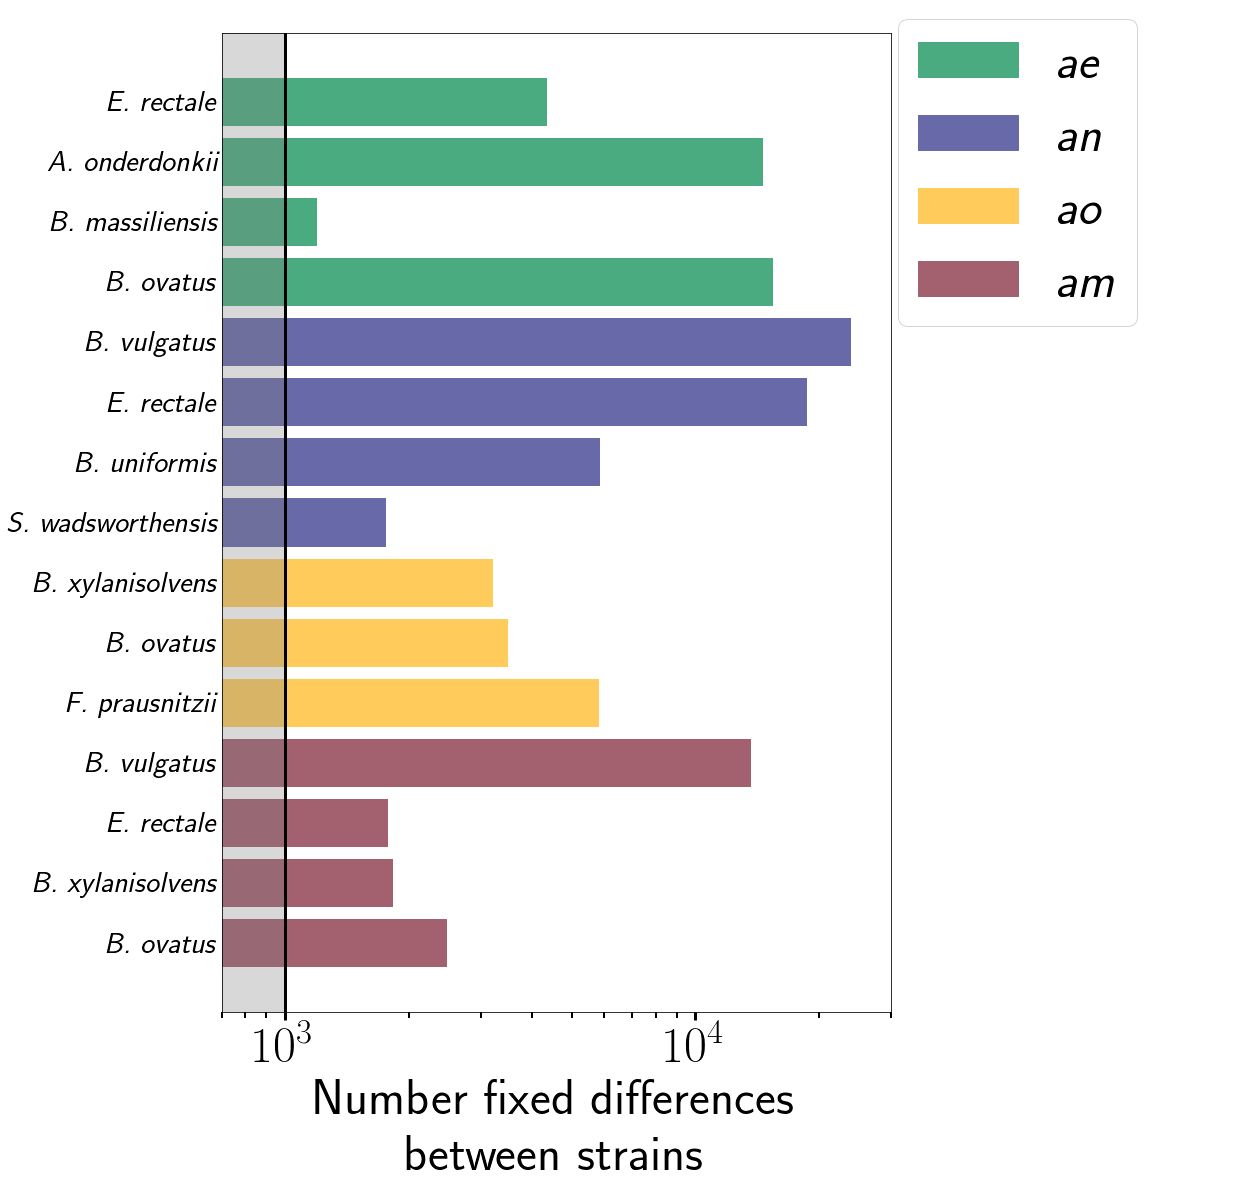

In [23]:
fig,ax = plt.subplots(figsize=(12,18))
ax.barh(range(len(H)),H,color=colors_list)
ax.semilogx()
ax.axvspan(1,1e3,color="grey",alpha=.3)
ax.set_xlim([7*1e2,3*1e4])
ax.axvline(1e3,color="k",lw=3)
ax.set_yticks(range(len(specs_list)))
ax.set_yticklabels(specs_list,size=30,va="center")
ax.set_xlabel("Number fixed differences \n between strains",size=50)

patches = []

for host in hosts[::-1]:
    patches.append(mpatches.Patch(color=palette_dic[host], label=r"$\textit{%s}$" % host))

fig.legend(handles=patches,prop={'size': 50},loc="upper left",bbox_to_anchor=(1.01,.92));                  